In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
print('Bibliotecas importadas com sucesso!')

Bibliotecas importadas com sucesso!


- x1 = velocidade de corte (mm/s)
- x2 = pressão específica do processo de pré-afilamento (N/mm²)
- x3 = pressão esécífica do processo de conclusão do afilamento
- Y = produtividade do processo de afilamento (mm³/s)

In [2]:
print('Modelo Proposto: Y = a * x1 ^ β1 * x2 ^ β2 * x3 ^ β3\n')
print('Portanto o modelo de regressão linear deve envolver os preditores ln(x1), ln(x2) e ln(x3)\n')

lstx1 = (0.93, 1.11, 0.93, 1.11, 0.93, 1.11, 0.93, 1.11,
       1.02, 1.02, 1.02, 1.02)
lstx2 = (1.00, 1.00, 1.00, 1.00, 1.40, 1.40, 1.40, 1.40, 
       1.18, 1.18, 1.18, 1.18)
lstx3= (0.20, 0.20, 0.50, 0.50, 0.20, 0.20, 0.50, 0.50,
      0.31, 0.31, 0.31, 0.31)
lsty= (32.95, 38.72, 35.20, 38.72, 32.27, 39.71, 33.67, 
     38.72, 35.20, 33.67, 36.02, 32.27)
df_ex18 = pd.DataFrame({'x1': lstx1, 'x2': lstx2, 'x3': lstx3, 'y': lsty})
df_ex18

Modelo Proposto: Y = a * x1 ^ β1 * x2 ^ β2 * x3 ^ β3

Portanto o modelo de regressão linear deve envolver os preditores ln(x1), ln(x2) e ln(x3)



,x1,x2,x3,y
0,0.93,1.00,0.20,32.95
1,1.11,1.00,0.20,38.72
2,0.93,1.00,0.50,35.20
3,1.11,1.00,0.50,38.72
4,0.93,1.40,0.20,32.27
5,1.11,1.40,0.20,39.71
6,0.93,1.40,0.50,33.67
7,1.11,1.40,0.50,38.72
8,1.02,1.18,0.31,35.20
9,1.02,1.18,0.31,33.67


In [3]:
ln_lstx1 = np.log(lstx1)
ln_lstx2 = np.log(lstx2)
ln_lstx3 = np.log(lstx3)
ln_lsty = np.log(lsty)
df_ex18_ln = pd.DataFrame({'ln_x1': ln_lstx1, 'ln_x2': ln_lstx2, 'ln_x3': ln_lstx3, 'ln_y': ln_lsty})
df_ex18_ln

,ln_x1,ln_x2,ln_x3,ln_y
0,-0.072571,0.000000,-1.609438,3.494991
1,0.104360,0.000000,-1.609438,3.656356
2,-0.072571,0.000000,-0.693147,3.561046
3,0.104360,0.000000,-0.693147,3.656356
4,-0.072571,0.336472,-1.609438,3.474138
5,0.104360,0.336472,-1.609438,3.681603
6,-0.072571,0.336472,-0.693147,3.516607
7,0.104360,0.336472,-0.693147,3.656356
8,0.019803,0.165514,-1.171183,3.561046
9,0.019803,0.165514,-1.171183,3.516607


In [4]:
x_pred_ex18 = sm.add_constant(df_ex18_ln[['ln_x1', 'ln_x2', 'ln_x3']])
y_pred_ex18 = df_ex18_ln['ln_y']
modelo_ex18 = sm.OLS(y_pred_ex18, x_pred_ex18, hasconst=True).fit()
print(modelo_ex18.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     6.398
Date:                Thu, 14 Sep 2023   Prob (F-statistic):             0.0161
Time:                        12:53:27   Log-Likelihood:                 21.634
No. Observations:                  12   AIC:                            -35.27
Df Residuals:                       8   BIC:                            -33.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5880      0.049     73.095      0.0

c:\Program Files\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
n = len(df_ex18_ln)
print('n =', n)
k = 3
print('k =', k)
gl = n - k - 1
print('gl =', gl)
alfa = 0.05
print('alfa =', alfa)
# Teste de utlidade do modelo
R_quadrado = modelo_ex18.rsquared
F_atual = (R_quadrado/k)/((1-R_quadrado)/gl)
print('F_atual =', F_atual)
F_crit = stats.f.ppf(1-alfa, k, gl)
print('F_crit =', F_crit)
print('\nComo F_atual > F_crit, o modelo é útil\n')
t_crit = stats.t.ppf(1-alfa/2, gl)
print('t_crit =', t_crit)
print('\nComo t_crit é maior que o t_atual do que beta_2 e beta_3, então somente beta_0 e beta_1 são significativos\n')

n = 12
k = 3
gl = 8
alfa = 0.05
F_atual = 6.397853661974334
F_crit = 4.06618055135116

Como F_atual > F_crit, o modelo é útil

t_crit = 2.3060041350333704

Como t_crit é maior que o t_atual do que beta_2 e beta_3, então somente beta_0 e beta_1 são significativos



In [6]:
# Recalcular o modelo considerando apenas os preditores significativos
x_pred_ex18 = sm.add_constant(df_ex18_ln[['ln_x1']])
y_pred_ex18 = df_ex18_ln['ln_y']
modelo_ex18 = sm.OLS(y_pred_ex18, x_pred_ex18, hasconst=True).fit()
print(modelo_ex18.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     22.01
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           0.000853
Time:                        12:53:27   Log-Likelihood:                 21.273
No. Observations:                  12   AIC:                            -38.55
Df Residuals:                      10   BIC:                            -37.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5549      0.013    266.062      0.0

c:\Program Files\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


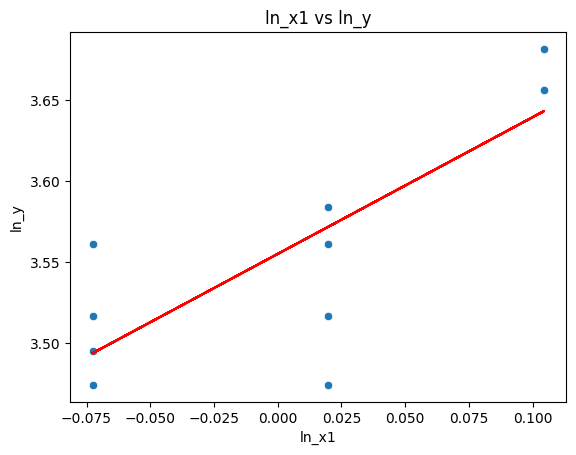

In [7]:
# Gráfico de ln_x1 vs ln_y com a reta de regressão
sns.scatterplot(x='ln_x1', y='ln_y', data=df_ex18_ln)
plt.plot(df_ex18_ln['ln_x1'], modelo_ex18.predict(), color='red')
plt.title('ln_x1 vs ln_y')
plt.xlabel('ln_x1')
plt.ylabel('ln_y')
plt.show()

In [8]:
# Análise de resíduos
y_pred_ex18 = list(modelo_ex18.predict())
residuos = modelo_ex18.resid # e
influencia_ex18 = modelo_ex18.get_influence()
residuos_padronizados = list(influencia_ex18.resid_studentized_internal) # e*
proporcao_residuos = np.divide(residuos, residuos_padronizados) # e/e*
df_ex18_residuos = pd.DataFrame({'lnx1': ln_lstx1, 'lny': ln_lsty,'lnyc': y_pred_ex18, 'e': residuos, 'e*': residuos_padronizados, 'e/e*': proporcao_residuos})
df_ex18_residuos

,lnx1,lny,lnyc,e,e*,e/e*
0,-0.072571,3.494991,3.493690,0.001301,0.032553,0.039971
1,0.104360,3.656356,3.642998,0.013358,0.332646,0.040157
2,-0.072571,3.561046,3.493690,0.067356,1.685111,0.039971
3,0.104360,3.656356,3.642998,0.013358,0.332646,0.040157
4,-0.072571,3.474138,3.493690,-0.019552,-0.489153,0.039971
5,0.104360,3.681603,3.642998,0.038605,0.961341,0.040157
6,-0.072571,3.516607,3.493690,0.022917,0.573341,0.039971
7,0.104360,3.656356,3.642998,0.013358,0.332646,0.040157
8,0.019803,3.561046,3.571642,-0.010596,-0.245800,0.043108
9,0.019803,3.516607,3.571642,-0.055035,-1.276683,0.043108


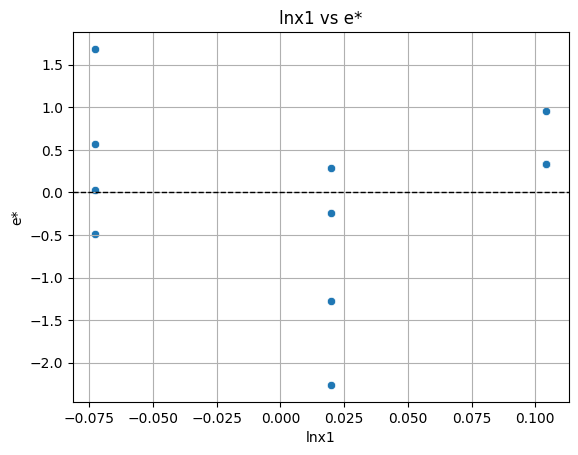

In [9]:
# Analisar resíduos e gráficos de adequabilidade
sns.scatterplot(x='lnx1', y='e*', data=df_ex18_residuos)
plt.title('lnx1 vs e*')
plt.xlabel('lnx1')
plt.ylabel('e*')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

c:\Program Files\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


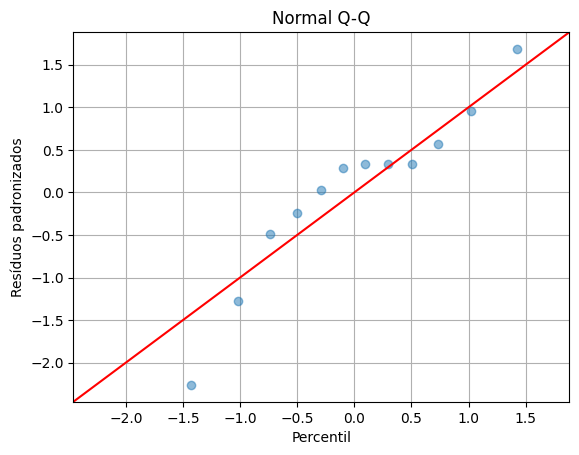

In [10]:
# QQPlot vs Nornal Distribution
QQ = ProbPlot(df_ex18_residuos['e*'])
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')
plt.grid(True)
plt.show()

<h3>Modelo Logístico</h3>

- x1 = proporção entre altura e largura dos pilares
- x2 = proporção da resistência ao estresse dos pilares
- y = situação de estabilidade para 29 pilares de carvão (1 = estável, 0 = instável)

In [11]:
lstx1 = (1.80, 1.65, 2.70, 3.67, 1.41, 1.76, 2.10, 2.10, 4.57, 3.59,
         8.33, 2.86, 2.58, 2.90, 3.89, 0.80, 0.60, 1.30, 0.83, 0.57, 
         1.44, 2.08, 1.50, 1.38, 0.94, 1.58, 1.67, 3.00, 2.21)
lstx2 = (2.40, 2.54, 0.84, 1.68, 2.41, 1.93, 1.77, 1.50, 2.43, 5.55,
         5.58, 2.00, 3.68, 1.13, 2.49, 1.37, 1.27, 0.87, 0.97, 0.94, 
         1.00, 0.78, 1.03, 0.82, 1.30, 0.83, 1.05, 1.19, 0.86)
lsty= (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

df_ex19 = pd.DataFrame({'x1': lstx1, 'x2': lstx2, 'y': lsty})
df_ex19

,x1,x2,y
0,1.80,2.40,1
1,1.65,2.54,1
2,2.70,0.84,1
3,3.67,1.68,1
4,1.41,2.41,1
5,1.76,1.93,1
6,2.10,1.77,1
7,2.10,1.50,1
8,4.57,2.43,1
9,3.59,5.55,1


In [12]:
x_pred_ex19 = sm.add_constant(df_ex19[['x1', 'x2']])
y_pred_ex19 = df_ex19['y']
modelo_ex19 = sm.Logit(y_pred_ex19, x_pred_ex19, hasconst=True).fit()
print(modelo_ex19.summary())

Optimization terminated successfully.
         Current function value: 0.151888
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   29
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Sep 2023   Pseudo R-squ.:                  0.7807
Time:                        12:53:27   Log-Likelihood:                -4.4048
converged:                       True   LL-Null:                       -20.084
Covariance Type:            nonrobust   LLR p-value:                 1.551e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1457      5.184     -2.536      0.011     -23.306      -2.985
x1             2.7740      1

In [14]:
n = len(df_ex19)
print('n =', n)
k = 2
print('k =', k)
gl = n - k - 1
print('gl =', gl)
alfa = 0.1
print('alfa =', alfa)
print('\nComo todos os p-value são menores que alfa, todos os preditores são significativos\n')

n = 29
k = 2
gl = 26
alfa = 0.1

Como todos os p-value são menores que alfa, todos os preditores são significativos



In [15]:
odds_ratio = pd.DataFrame(
    {
        'OR': modelo_ex19.params,
        'Lower CI': modelo_ex19.conf_int()[0],
        'Upper CI': modelo_ex19.conf_int()[1],
    }
)
print(odds_ratio)
odds_ratio = np.exp(odds_ratio)
print(odds_ratio)

              OR   Lower CI   Upper CI
const -13.145657 -23.306390  -2.984923
x1      2.774021  -0.121639   5.669680
x2      5.668211   0.489678  10.846743
               OR      Lower CI      Upper CI
const    0.000002  7.553761e-11      0.050543
x1      16.022926  8.854677e-01    289.941871
x2     289.516064  1.631791e+00  51366.594509


In [16]:
y_hat = modelo_ex19.predict()
prediction = list(map(round, y_hat))

# Comparar valores originais e previstos para y
print('Valores observados:', list(df_ex19['y']))
print('Valores previstos:', prediction)

Valores observados: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Valores previstos: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [21]:
# Calcular acurácia do modelo
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
cm = confusion_matrix(df_ex19['y'], prediction)
print('Confusion Matrix:\n', cm, '\n')

# Acurácia do modelo
print('Teste de acurária =', accuracy_score(df_ex19['y'], prediction))

Confusion Matrix:
 [[13  1]
 [ 1 14]] 

Teste de acurária = 0.9310344827586207


In [22]:
corr_df = df_ex19.corr()
corr_df

,x1,x2,y
x1,1.000000,0.688096,0.538367
x2,0.688096,1.000000,0.608092
y,0.538367,0.608092,1.000000


In [23]:
corr = np.corrcoef(df_ex19, rowvar=0) 
print(corr)

[[1.         0.68809573 0.53836676]
 [0.68809573 1.         0.60809228]
 [0.53836676 0.60809228 1.        ]]
